In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm 
import warnings
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
warnings.filterwarnings("ignore")

spec_dir = './data_products/'  # The repo where your nav file is stored
savefile = './try.pdf' # the repo where your image will be saved

In [3]:
hdux = fits.open(spec_dir + 'jw01022-o023_t001_miri_ch2-short_s3d_nav.fits')
hdrx= hdux['SCI'].header
wave = np.arange(hdrx['NAXIS3'])*hdrx['CDELT3']+hdrx['CRVAL3']

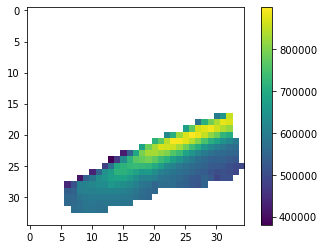

In [4]:
# ===================================================
wavelength = 7.71 # wavelength in microns you want to observe
CM = 300 # Central meridian in the observation
# ===================================================

for i in range(len(wave)):
    if wave[i] >= wavelength:
        qub_slice = i
        break

data = hdux['SCI'].data[qub_slice,:,:]
data[data == 0] = 'nan'
lat = hdux['LAT_CENT'].data
lon = hdux['LON_EAST'].data

lat = np.radians(lat)
lon = np.radians(lon)

for i in range(int(data.shape[0])):
    for ii in range(int(data.shape[1])):
        if lat[i,ii] == 0:
            data[i,ii] = np.nan

lat[lat == 0] = -np.pi/2 
lon[lon == 0] = np.radians(CM)

plt.imshow(data) #showing only spaxels inside the planet and inside the FOV
plt.colorbar()

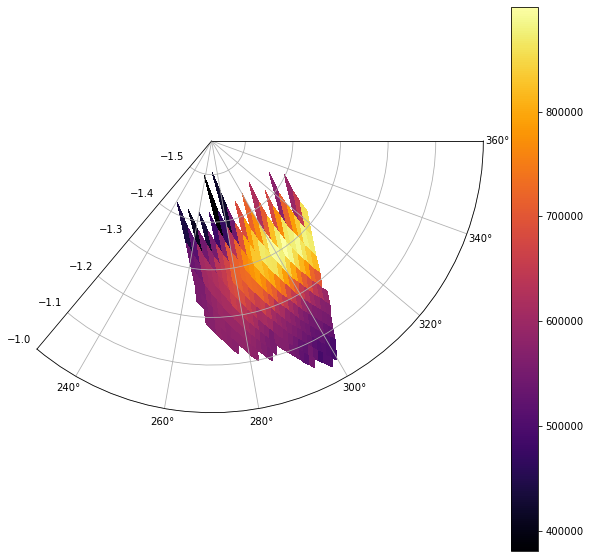

In [5]:
# If you want to smooth the polar plot, change smooth to True.


# ===================================================
lonleft = 230
lonright = 360
smooth = False
# ===================================================

fig = plt.figure()
fig.set_size_inches(10, 10)
r = lat
th = lon
z = data

plt.subplot(projection="polar")

if smooth == True:
    c = plt.pcolormesh(th, r, z,shading='gouraud', cmap='inferno')
    plt.colorbar(c)
elif smooth == False:
    c = plt.pcolormesh(th, r, z,shading='flat', cmap='inferno')
    plt.colorbar(c)
    


plt.plot(r, th, color='y', ls='None') 

plt.xlim(np.radians(lonleft),np.radians(lonright))
plt.ylim(-np.pi/2,-1)

plt.grid()
plt.savefig(savefile)
plt.show()